# Team 12 - Assignment 02: Linear Regression Project Classification Tree

Using a [Python version that is 3.10+](https://www.python.org/downloads/)
globally or in a [virtual environment](https://realpython.com/python-virtual-environments-a-primer/)

1. Update pip: `python.exe -m pip install --upgrade pip`
2. run the following command in your terminal: `pip install -r requirements.txt`

This will install the required dependencies to run our Python code

- [ipykernal](https://pypi.org/project/ipykernel/)
- [scikit-learn](https://pypi.org/project/scikit-learn/)
- [matplotlib](https://pypi.org/project/matplotlib/)
- [pandas](https://pypi.org/project/pandas/)
- [numpy](https://pypi.org/project/numpy/)
- [notebook](https://pypi.org/project/notebook/)

## Team 12 Members

- [Alicia Luna](https://github.com/aluna4)
- [Derek Dilger](https://github.com/derekdilger)
- [Gary Young](https://github.com/garyyoungcsc)
- [Ian Schultz](https://github.com/Ian-Sanity)
- [Jesus Cervantes](https://github.com/Jescer3)
- [Matthew Mendoza](https://github.com/matt2ology)
- [Thomas Jaramillo-Ochoa](https://github.com/tjaramillo452329)
- [Yunjeong Lee](https://github.com/yunjeongiya)


## (a) Regression - Using any of the data in previous assignment


### Simple Linear Regression model


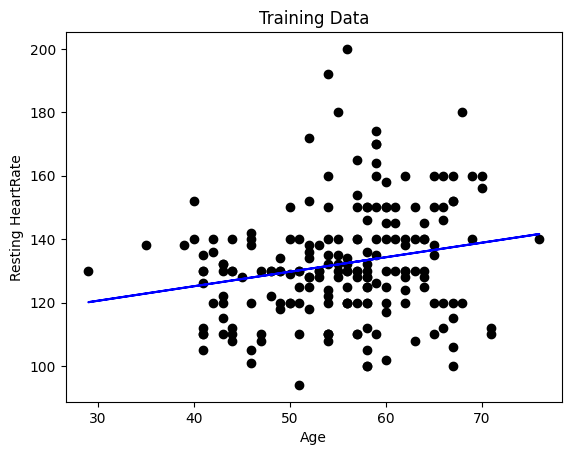

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn import linear_model

path = "."

filename = os.path.join(
    path, "data/part_a_uci_heartDisease/uci_heartDisease_splitting.csv")
df = pd.read_csv(filename, na_values=['NA', '?'])

x = df[['age']]
y = df[['trestbps']]

x_train, x_test, y_train, y_test = train_test_split(
    x,  # This is the input data to be trained on
    y,  # This is the output data to be trained on
    test_size=0.35,  # This is the percentage of data to be used for testing
    random_state=17  # This randomizes the data so that it is not in order
)

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(x_train, y_train)

# Predicting y from the linear regression model
y_pred = regr.predict(x_test)

plt.scatter(x_train, y_train, color='black')
plt.plot(x_train, regr.predict(x_train), color='blue')
plt.title('Training Data')
plt.xlabel('Age')
plt.ylabel('Resting HeartRate')
plt.show()

### Multiple Regression Model


In [55]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

step 1: Split Input Data into Training and Test Sets


In [56]:
df = pd.read_csv(
    r"./data/part_a_uci_heartDisease/uci_heartDisease_splitting.csv"
)

x = df[['age']]
y = df[['trestbps']]

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.23,
    random_state=29
)

Step 2: Fit Regression Model to Training Set


In [57]:
# create linear regression obj
regr = linear_model.LinearRegression()

# fit regression model to the training set
regr.fit(x_train, y_train)

LinearRegression()

Step 3: Apply Model to the Test Set


In [58]:
# apply model to the test set
y_pred_test = regr.predict(x_test)

Step 4: Evaluate model performance on test set


Root mean squared error = 16.4225
R-squared = 0.0617


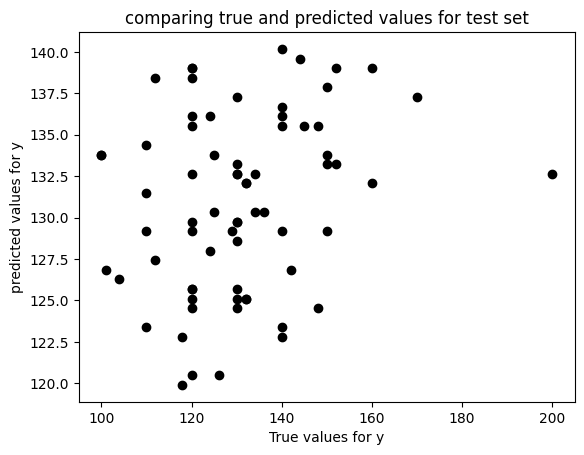

In [59]:
# comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('predicted values for y')


# model evaluation
print("Root mean squared error = %.4f" %
      np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Step 5 Post Processing


Sloped =  0.5793781577100989
Intercept =  100.20225975374527


/var/folders/c8/1kmjz83x5sd1xtd11tdd8ds80000gn/T/ipykernel_4337/1341575864.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  titleStr = 'Predicted Function: y = %.2fX + %.2f' % (


Text(0, 0.5, 'Age')

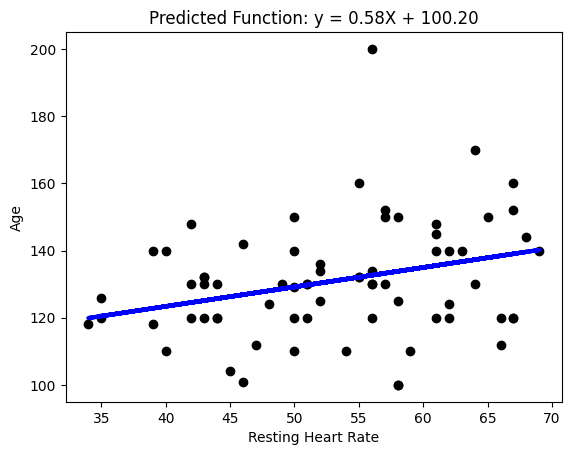

In [60]:
# display model parameters
print('Sloped = ', regr.coef_[0][0])
print('Intercept = ', regr.intercept_[0])

# plot outputs
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred_test, color='blue', linewidth=3)
titleStr = 'Predicted Function: y = %.2fX + %.2f' % (
    regr.coef_[0], regr.intercept_[0]
)
plt.title(titleStr)
plt.xlabel('Resting Heart Rate')
plt.ylabel('Age')

## (b) Regression and Classification using a new data set provided in file


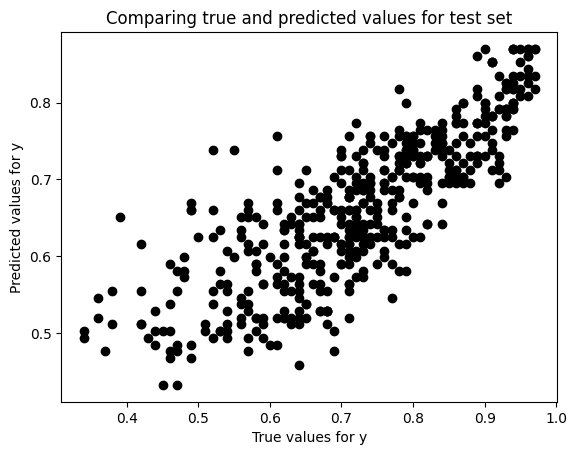

Root mean squared error = 0.1021
R-squared = 0.4778


In [61]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Read the data
path = "./data/part_b_linear_regression_data"
filename_read = os.path.join(
    path, "admission_predict_ver1.1_small_data_set_for_linear_regression.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

# Define X and y
X = df[['GRE Score']]
y = df['Chance of Admit']

# Define the number of training instances and compute number of test instances
numTrain = 20
numTest = len(X) - numTrain

# Split data using the defined number of instances
X_train = X[:-numTest]
X_test = X[-numTest:]
y_train = y[:-numTest]
y_test = y[-numTest:]

# Create linear regression object and fit to training set
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Apply model to the test set
y_pred_test = regr.predict(X_test)

# Visualization - comparing true vs predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
plt.show()

# Model evaluation
print("Root mean squared error = %.4f" %
      np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

## (c) Classification Tree Homework - Entropy ID3 Exercise

This can be found in a separate PDF document found here:

[assignment02_part_c_entropy_id3_solution_derek_dilger.pdf](assignment02_part_c_entropy_id3_solution_derek_dilger.pdf)


## (c) Classification Tree Homework


Discretize the last column "Chance of Admit" into three classes and
create a classification tree with training data. Test the tree with test data
and evaluate the results in Python.


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import os

# Path to the CSV file containing the data to be used for this part of the assignment
path_to_data_file_csv: str = os.path.normpath(
    r"./data/part_b_linear_regression_data/admission_predict_ver1.1_small_data_set_for_linear_regression.csv"
)

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(path_to_data_file_csv)

# Discretize the "Chance of Admit" column into three classes
df['Chance of Admit'] = pd.cut(
    df['Chance of Admit'],  # Column to discretize (continuous)
    bins=3,  # Number of bins to use for discretization
    labels=['Low', 'Medium', 'High']  # Labels for the three classes
)

# Split the data into training and testing sets
x_train: pd.DataFrame  # Training data (features) (80% of the data)
x_test: pd.DataFrame  # Testing data (features) (20% of the data)
y_train: pd.Series  # Training data (target) (80% of the data)
y_test: pd.Series  # Testing data (target) (20% of the data)
x_train, x_test, y_train, y_test = train_test_split(
    # Drop the target column from the training data (axis=1 means column)
    df.drop('Chance of Admit', axis=1),
    # Target column (Chance of Admit) for training data
    df['Chance of Admit'],
    # 20% of the data will be used for testing (80% for training)
    test_size=0.2,
    # Random seed for reproducibility of results (42 is arbitrary)
    random_state=42
)

# Create a DecisionTreeClassifier object
clf: DecisionTreeClassifier = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(x_train, y_train)  # No need to scale the data for decision trees

# Predict the classes of the testing data
y_pred: list = clf.predict(x_test)

# Evaluate the performance of the classifier
accuracy: float = accuracy_score(y_test, y_pred)

# Accuracy denotes the percentage of correct predictions
print('Accuracy:', accuracy)

Accuracy: 0.77


### Describe a few rules (3 to 5 valuable rules are sufficient). Which rules do you think are the most valuable?

A few valuable rules for working with the given file:

1. Always make a backup of the original file before making any changes to it.
   This ensures that you can always revert back to the original data if
   something goes wrong.
2. Check for missing values in the data and handle them appropriately.
   Missing values can cause errors in the analysis and can lead to
   incorrect conclusions.
3. Normalize the data if necessary. Normalization can help to improve the
   performance of some machine learning algorithms by ensuring that all
   features are on the same scale.
4. Split the data into training and testing sets before building any models.
   This helps to ensure that the model is not over-fitting to the training data
   and can generalize well to new data.
5. Evaluate the performance of the model using appropriate metrics.
   Different models may require different evaluation metrics,
   so it's important to choose the right metric for the task at hand.

I think the most valuable rules are 2, 4, and 5. Handling missing values,
splitting the data into training and testing sets, and evaluating the
performance of the model are all critical steps in the data analysis process.
These steps help to ensure that the analysis is accurate, reliable, and
can be generalized to new data.


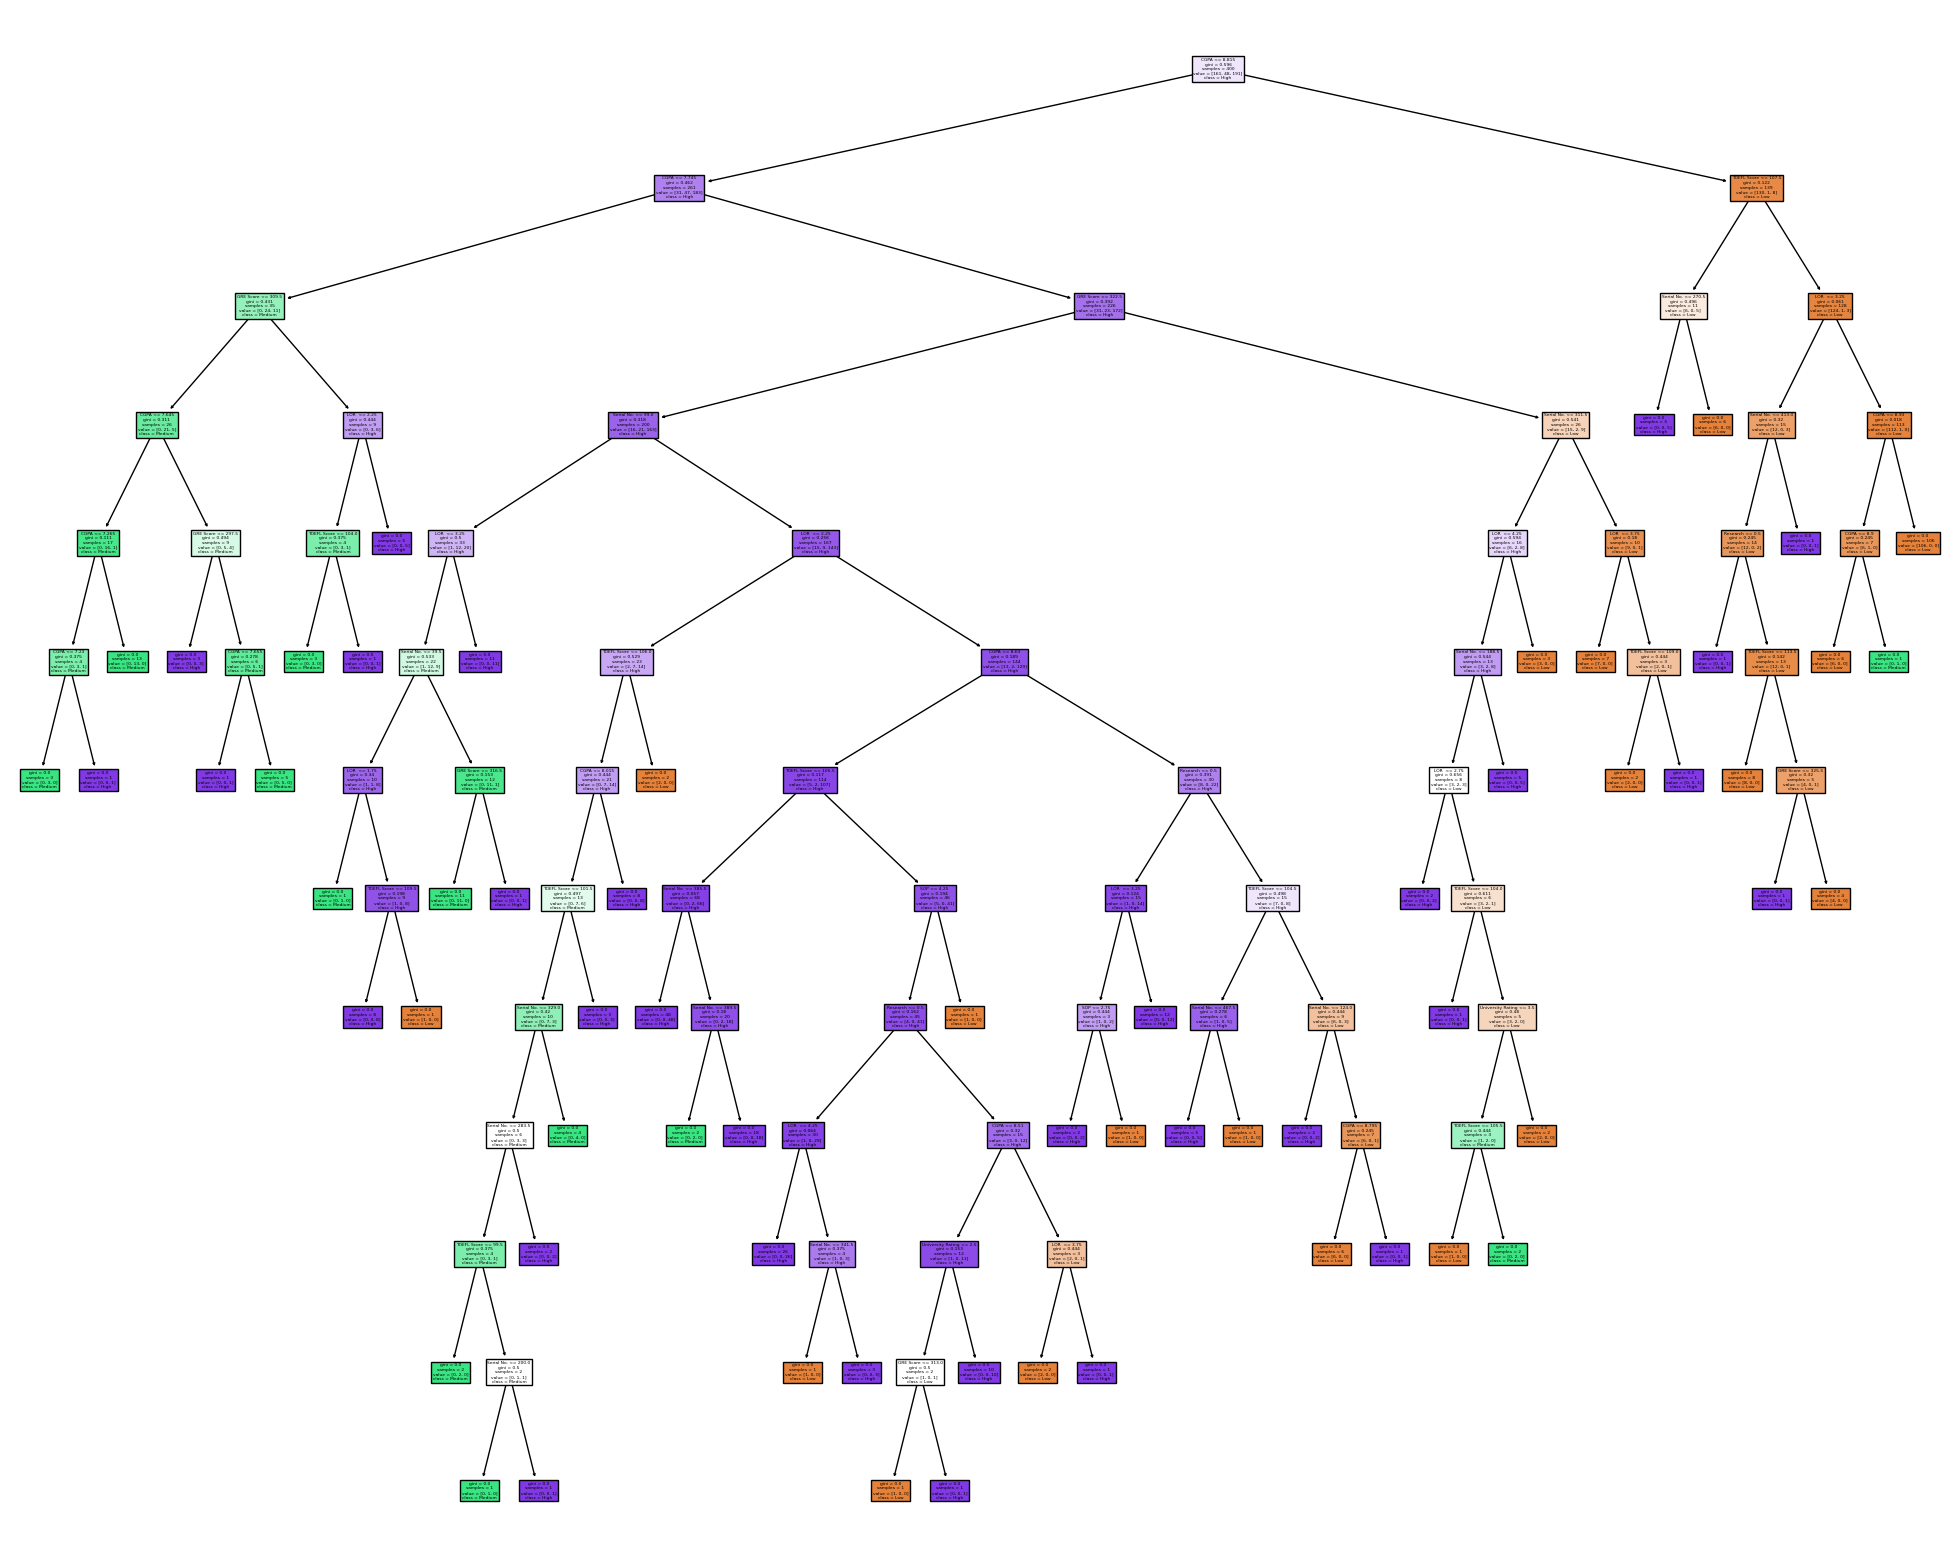

In [63]:
# Plot the decision tree in full resolution (600 dpi) in a PDF file
from sklearn import tree
import matplotlib.pyplot as plt
import os

# Is close to the resolution of a 4K monitor (3840x2160)
fig = plt.figure(figsize=(25, 20))

_ = tree.plot_tree(
    clf,
    feature_names=x_train.columns,
    class_names=['Low', 'Medium', 'High'],
    filled=True
)  # Underscore is used to suppress the output of the function call

# Save the figure to a PDF file in the data folder of the project directory
fig.savefig(os.path.normpath(r"./data/part_c_decision_tree.pdf"), dpi=600)

# show
plt.show()